# Pandas analysis of coronavirus pandemic

## Setup

In [1]:
import pandas as pd
import numpy as np

import os
import platform
from platform import python_version
import jupyterlab

import matplotlib.pyplot as plt
from datetime import datetime

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

System
os name: posix
system: Darwin
release: 18.7.0

Python
version: 3.7.3

Python Packages
jupterlab==1.1.5
pandas==1.0.0
numpy==1.17.4


In [2]:
source_url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"

In [3]:
df = pd.read_csv(source_url)
df.shape

(12036, 5)

In [4]:
df.Date = pd.to_datetime(df.Date)

In [5]:
df = df.sort_values('Date').reset_index(drop=True)

In [6]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Morocco,0,0,0
2,2020-01-22,Mozambique,0,0,0
3,2020-01-22,Namibia,0,0,0
4,2020-01-22,Nepal,0,0,0


In [7]:
df.Country.value_counts()

Central African Republic    68
Mauritania                  68
Sri Lanka                   68
Dominica                    68
Cyprus                      68
                            ..
Hungary                     68
Iran                        68
Singapore                   68
Papua New Guinea            68
Guatemala                   68
Name: Country, Length: 177, dtype: int64

In [8]:
countries = ['US', 'Italy', 'Korea, South', 'China']

In [9]:
df.loc[:, 'n_hospitalized'] = df.Confirmed - df.Recovered - df.Deaths

In [10]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,n_hospitalized
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Morocco,0,0,0,0
2,2020-01-22,Mozambique,0,0,0,0
3,2020-01-22,Namibia,0,0,0,0
4,2020-01-22,Nepal,0,0,0,0


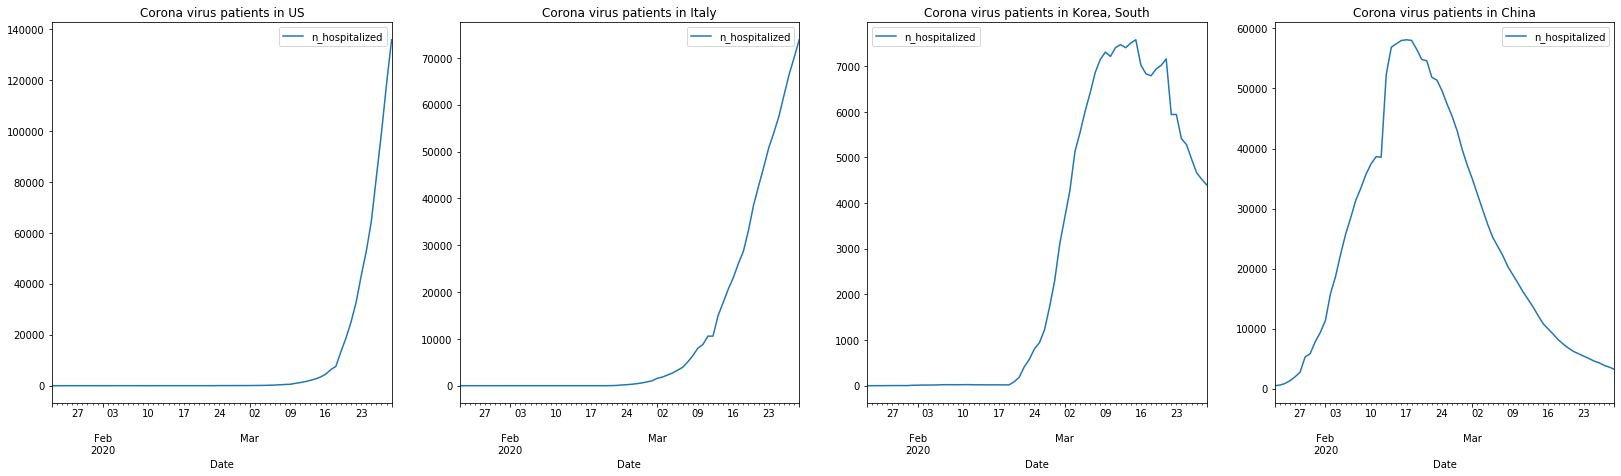

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(28, 7))

for i in range(4):
    country = countries[i]
    ax[i].set_title('Corona virus patients in %s' % country)
    df[df.Country == country][['Date', 'n_hospitalized']].plot(ax=ax[i], x='Date')

In [20]:
df.loc[:, 'n_confirmed_per_day'] = df.sort_values('Date').groupby('Country')['Confirmed'].diff().fillna(0).astype(int)
df.loc[:, 'n_recovered_per_day'] = df.sort_values('Date').groupby('Country')['Recovered'].diff().fillna(0).astype(int)
df.loc[:, 'n_deaths_per_day'] = df.sort_values('Date').groupby('Country')['Deaths'].diff().fillna(0).astype(int)

In [21]:
df.loc[:, 'n_hospitalized_per_day'] = df.n_confirmed_per_day -  df.n_recovered_per_day - df.n_deaths_per_day

In [23]:
df[df.Country == "US"].head()

,Date,Country,Confirmed,Recovered,Deaths,n_hospitalized,n_confirmed_per_day,n_recovered_per_day,n_deaths_per_day,n_hospitalized_per_day
51,2020-01-22,US,1,0,0,1,0,0,0,0
228,2020-01-23,US,1,0,0,1,0,0,0,0
405,2020-01-24,US,2,0,0,2,1,0,0,1
582,2020-01-25,US,2,0,0,2,0,0,0,0
759,2020-01-26,US,5,0,0,5,3,0,0,3


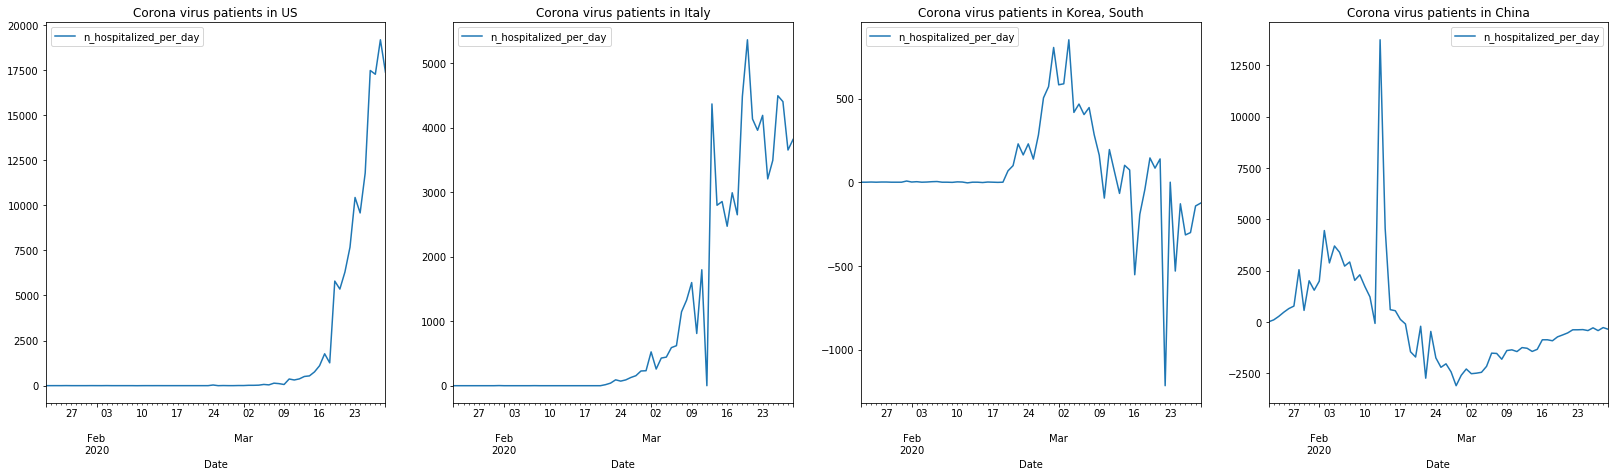

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(28, 7))
countries = ['US', 'Italy', 'Korea, South', 'China']

for i in range(4):
    country = countries[i]
    ax[i].set_title('Corona virus patients in %s' % country)
    df[df.Country == country][['Date', 'n_hospitalized_per_day']].plot(ax=ax[i], x='Date')